# 1. Análise Exploratória de Dados

# 1.3 Análise Bidimensional

**Dependência entre Variáveis Qualitativas**

O teste de **Chi Quadrado** mede a relação de dependência entre duas variáveis categóricas, verificando como os valores esperados desviam dos valores observados. 

Aqui vamos para o exemplo prático de aplicação em python, mas caso você queira compreender a metodologia do teste segue um vídeo explicativo:
https://www.youtube.com/watch?v=hpWdDmgsIRE

In [19]:
#pip install researchpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import math
import statistics 
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr
import researchpy as rp
import scipy.stats as stats
import warnings

In [2]:
df = pd.read_csv('C:/Users/Maria Tereza Boada/Desktop/Estatística/datasets/estado_produto.csv')
df

,Estado,Produto
0,São Paulo,Soja
1,São Paulo,Soja
2,São Paulo,Soja
3,São Paulo,Soja
4,São Paulo,Soja
...,...,...
232,Rio G. do Sul,Milho
233,Rio G. do Sul,Milho
234,Rio G. do Sul,Milho
235,Rio G. do Sul,Milho


In [3]:
warnings.filterwarnings("ignore")

In [4]:
#Efetuamos um cross-tab para trazer a tabela de contingência
contingency= pd.crosstab(df['Estado'], df['Produto']) 
contingency

Produto,Arroz,Milho,Soja
Estado,,,
Paraná,19,49,22
Rio G. do Sul,49,17,21
São Paulo,17,9,34


In [5]:
c, p, dof, expected = chi2_contingency(contingency) 
expected 

array([[32.27848101, 28.48101266, 29.24050633],
       [31.20253165, 27.53164557, 28.26582278],
       [21.51898734, 18.98734177, 19.49367089]])

In [6]:
print(p)

3.1212078029621446e-11


O resultado do teste deu um **p-valor** inferior a 5%, o teste indica que existe correlação entre Estado e Produto em nossa base de dados utilizando um **intervalo de confiança** de 95%.

**Dependência entre Variáveis Quantitivas**

Vamos utilizar o coeficiente de correlação de **Spearman**

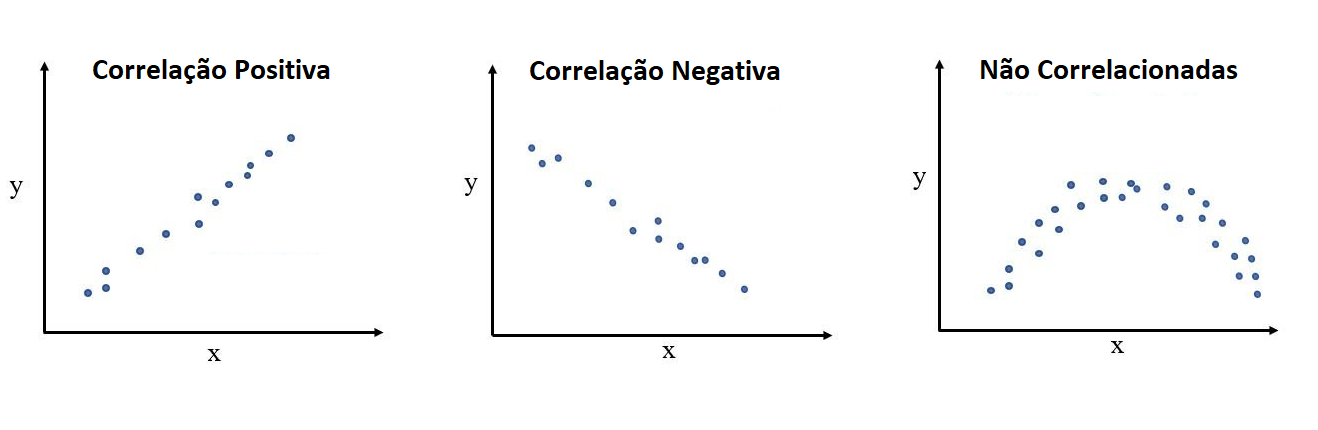

In [7]:
df = pd.read_csv('C:/Users/Maria Tereza Boada/Desktop/Estatística/datasets/peso_altura.csv')
df

,Peso,Altura
0,56,1.67
1,66,1.50
2,63,1.48
3,53,1.57
4,70,1.44
...,...,...
95,79,1.87
96,73,1.85
97,85,1.77
98,99,1.90


In [8]:
df.corr(method='spearman')

,Peso,Altura
Peso,1.000000,0.666126
Altura,0.666126,1.000000


In [9]:
coef, p = spearmanr(df['Peso'], df['Altura'])
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Samples are correlated (reject H0) p=0.000


O resultado do teste deu um **p-valor** inferior a 5%, o teste indica que **existe correlação** entre Peso e Altura em nossa base de dados utilizando um **intervalo de confiança** de 95%.

**Dependência entre Variáveis Qualitativas e Quantitivas**

Como nos casos anteriores, é conveniente poder contar com uma **medida** que quantifique o **grau de dependência** entre as variáveis. <br>
As **variâncias** podem ser usadas como insumos para construir essa medida. <br>
A **variância** calculada para a **variável quantitativa** mede a **dispersão** dos dados globalmente. <br>
Se a **variância** dentro de cada categoria for **pequena** e **menor do que a global**, significa que **a variável qualitativa melhora a capacidade de previsão da quantitativa** e portanto **existe uma relação** entre as duas variáveis.

Para isso vamos usar a análise de variância **ANOVA**.

Vamos trabalhar com a base **mega_enviesada** que é a base da mega-sena **alterada** para que as ordem das bolas tenha correlação com os valores sorteados, o que não ocorreria em condições normais do sorteio.

In [279]:
df = pd.read_csv('C:/Users/Maria Tereza Boada/Desktop/Estatística/datasets/mega_enviesada.csv')
df

,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,1,11,11,16,21,26
1,1,11,11,16,21,26
2,1,11,11,16,21,26
3,12,22,22,27,32,37
4,32,42,42,47,52,57
...,...,...,...,...,...,...
738,1,11,11,16,21,26
739,30,40,40,45,50,55
740,18,28,28,33,38,43
741,39,49,49,54,59,60


In [271]:
#teste ANOVA
stats.f_oneway(df['bola 1'],
               df['bola 2'],
               df['bola 3'],
               df['bola 4'],
               df['bola 5'],
               df['bola 6'])

F_onewayResult(statistic=333.9128657276462, pvalue=1.515105800746208e-304)

O resultado do teste deu um **p-valor** inferior a **5%**, o teste indica que existe correlação entre a **ordem das bolas** e os **valores sorteados** em nossa base de dados utilizando um intervalo de confiança de **95%**.

**Teste de Homogeneidade da Variância**

Na **ANOVA** assume-se que as variáveis são **independentes**, têm **distribuição normal** com **variância homogênea**.

Para verificar se a distribuição das variáveis do nosso dataset obedece a essas condições vamos usar o teste de **KS (Kolmogorov Smirnov)** para verificar a **normalidade** das variáveis e o teste de **Levene** para verificar a **homogeneidade da variância**.

**KS (Kolmogorov Smirnov)**

In [272]:
ks_bola_1 =stats.kstest(df['bola 1'],'norm')
print(ks_bola_1)

KstestResult(statistic=0.8413447460685429, pvalue=0.0)


In [273]:
ks_bola_2 =stats.kstest(df['bola 2'],'norm')
print(ks_bola_2)

KstestResult(statistic=1.0, pvalue=0.0)


In [274]:
ks_bola_3 =stats.kstest(df['bola 3'],'norm')
print(ks_bola_3)

KstestResult(statistic=1.0, pvalue=0.0)


In [275]:
ks_bola_4 =stats.kstest(df['bola 4'],'norm')
print(ks_bola_4)

KstestResult(statistic=1.0, pvalue=0.0)


In [276]:
ks_bola_5 =stats.kstest(df['bola 5'],'norm')
print(ks_bola_5)

KstestResult(statistic=1.0, pvalue=0.0)


In [277]:
ks_bola_6 =stats.kstest(df['bola 6'],'norm')
print(ks_bola_6)

KstestResult(statistic=1.0, pvalue=0.0)


O resultado do teste deu um **p-valor** inferior a **5%**, o teste indica que as variáveis obedecem uma **distribuição normal** utilizando um intervalo de confiança de **95%**.

O resultado condiz com a base **enviesada** para que os números apresentem valores **maiores** a medida que as bolas são sorteadas.

Verifique o comportamente no gráfico abaixo:

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd999a0790>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd999a2040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd999a0250>,
 'medians': [<matplotlib.lines.Line2D at 0x1dd999a29a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1dd999a41f0>,
 'means': [<matplotlib.lines.Line2D at 0x1dd999a2e20>,
  <matplotlib.lines.Line2D at 0x1dd998922e0>]}

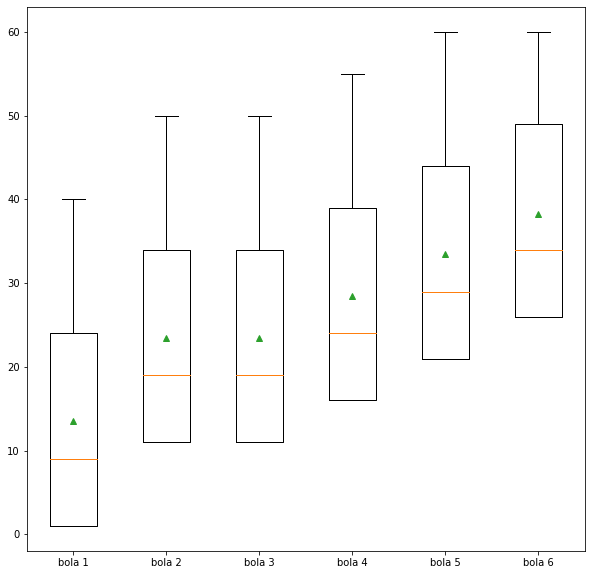

In [280]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
data = [df['bola 1'],
               df['bola 2'],
               df['bola 3'],
               df['bola 4'],
               df['bola 5'],
               df['bola 6']]

ax.boxplot(data,
           labels= ['bola 1', 'bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6'],
           showmeans= True)

**Levene** 

Para validar o teste **ANOVA** precisamos ainda verificar se as variâncias são distribuidas de maneira homogênea, vamos usar o teste de **Levene**:

In [284]:
stats.levene(df['bola 1'],df['bola 2'],df['bola 3'],df['bola 4'],df['bola 5'],df['bola 6'], center='mean')

LeveneResult(statistic=0.22866543481390542, pvalue=0.9501755470166409)

O **p-valor** do teste é menor que **5%**, indicando que as variâncias são **homogêneas**.

Deste modo, atendemos todas as premissas para validar o teste **ANOVA**, indicando que **existe** correlação entre a **ordem** das bolas sorteadas e os **valores** resultantes.